Chapter 17

# 牛顿法
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码实现了**牛顿法**求解函数的根，并通过可视化展示了牛顿法的迭代过程和收敛性。以下从数学角度详细描述每部分的功能及其背后的数学原理。

---

### 代码描述及数学分析

#### 1. **绘图参数设置**
代码使用 `matplotlib` 设置绘图参数，以增强可视化效果，例如字体样式、坐标轴网格和刻度。

#### 2. **目标函数与导数定义**
目标函数被定义为：
$$
f(x) = 2x^2 - 8x + 1
$$
该函数是一个二次多项式，其根可以通过求解 $f(x) = 0$ 得到。

导数被计算为：
$$
f'(x) = \frac{d}{dx}[2x^2 - 8x + 1] = 4x - 8
$$
使用 `sympy` 的 `diff` 函数自动计算导数，确保数学表达式的准确性。然后通过 `lambdify` 将符号函数转换为可执行的 Python 函数，以便在数值计算中使用。

#### 3. **牛顿法求根**
牛顿法是一个迭代方法，用于求解非线性方程 $f(x) = 0$ 的根。其数学思想基于泰勒展开和线性近似。给定当前点 $x_k$，通过切线逼近找到下一次迭代点 $x_{k+1}$：
$$
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}
$$
这个公式是牛顿法的核心公式。

牛顿法的迭代条件：
1. 如果 $f'(x_k) \approx 0$，方法可能失效，因为分母趋近于零。
2. 当 $|x_{k+1} - x_k| < \text{tol}$，即两次迭代的差小于指定容差 $tol$，算法收敛。

#### 4. **迭代过程与收敛性分析**
代码实现了牛顿法的完整迭代过程，并记录每次迭代的 $x_k$ 值，以便可视化。

迭代过程的收敛性依赖于初始点 $x_0$ 和函数的性质：
- 当初始点接近根时，牛顿法通常以二次收敛速度收敛，即误差 $|x_k - r|$ 满足：
  $$
  |x_{k+1} - r| \approx C|x_k - r|^2
  $$
  其中 $r$ 是函数的根，$C$ 是一个常数。
- 若初始点选择不当或导数在某点接近零，可能导致算法发散或无法收敛。

#### 5. **牛顿法可视化**
代码通过 `visualize_newton` 函数展示了牛顿法的几何直观过程：
1. 绘制函数曲线 $f(x)$ 和横轴 $y=0$，以展示根的位置。
2. 使用切线显示每次迭代的更新过程：
   - 点 $x_k$ 到切线与横轴交点的移动。
   - 垂直线从 $f(x_k)$ 投影到横轴。
3. 用红色标记每次迭代的点 $x_k$ 和对应的函数值 $f(x_k)$。

#### 6. **收敛性可视化**
代码通过 `visualize_convergence` 函数展示了 $x_k$ 随迭代次数的变化图：
- 横轴为迭代次数 $k$；
- 纵轴为迭代点 $x_k$；
- 图形直观显示了牛顿法的收敛轨迹。

#### 7. **测试部分**
初始点选择为 $x_0 = -2.0$，进行牛顿法迭代：
- 检查 $f'(x)$ 是否接近零，避免除零错误；
- 记录每次迭代的 $x_k$ 值，并返回近似根、迭代次数和所有迭代值。

---

### 数学背景总结
1. **牛顿法适用范围**：
   - 函数 $f(x)$ 必须在根附近可微且导数非零。
   - 牛顿法适用于初始点接近真实根的情况，否则可能发散或收敛到非目标根。

2. **收敛性**：
   牛顿法具有二次收敛速度，即误差的平方比例下降。这是其相较于其他数值方法（如二分法）的显著优势。

3. **几何解释**：
   牛顿法的迭代过程可以视为每次使用当前点的切线逼近函数的零点，从而逐步逼近真实根。

通过上述代码的实现，可以直观理解牛顿法的原理、优势及局限性，同时通过可视化加深对其迭代过程的理解。

## 导入包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, lambdify

In [2]:
p = plt.rcParams  # 获取默认绘图参数
p["font.sans-serif"] = ["Roboto"]  # 设置无衬线字体为 Roboto
p["font.weight"] = "light"  # 设置字体粗细为 light
p["ytick.minor.visible"] = True  # 显示 y 轴的小刻度
p["xtick.minor.visible"] = True  # 显示 x 轴的小刻度
p["axes.grid"] = True  # 启用坐标轴网格
p["grid.color"] = "0.5"  # 设置网格颜色为灰色
p["grid.linewidth"] = 0.5  # 设置网格线宽度

## 使用 sympy 定义目标函数和导数

In [3]:
x = symbols('x')
func = 2*x**2 - 8*x + 1
func

2*x**2 - 8*x + 1

In [4]:
func_prime = diff(func, x)
func_prime

4*x - 8

## 将函数和导数转换为可执行的 Python 函数

In [5]:
f = lambdify(x, func, 'numpy')
f_prime = lambdify(x, func_prime, 'numpy')

## 牛顿法求根函数

In [6]:
def newton_method(f, f_prime, x0, tol=1e-6, max_iter=100):
    x_vals = [x0]  # 记录迭代值以便可视化
    for i in range(max_iter):
        fx = f(x0)
        fpx = f_prime(x0)
        if abs(fpx) < 1e-10:  # 避免除零
            raise ValueError("导数接近零，牛顿法可能无法收敛。")

        x1 = x0 - fx / fpx  # 牛顿迭代公式
        x_vals.append(x1)

        if abs(x1 - x0) < tol:  # 收敛条件
            return x1, i + 1, x_vals

        x0 = x1

    raise ValueError("迭代未能在最大步数内收敛。")

## 可视化牛顿法过程

In [7]:
def visualize_newton(f, x_vals):
    x = np.linspace(-3, 3, 500)
    y = f(x)

    plt.figure(figsize=(6, 6))
    plt.plot(x, y, color="blue")
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--")

    # 绘制牛顿法迭代过程
    for i in range(len(x_vals) - 1):
        x0 = x_vals[i]
        x1 = x_vals[i + 1]
        plt.scatter(x0, f(x0), color="red", marker = 'x')
        plt.scatter(x0, 0, color="red", marker = 'x')
        plt.plot([x0, x0], [0, f(x0)], lw = 0.2, color="k", linestyle="-")  # 垂直线
        plt.plot([x0, x1], [f(x0), 0], lw = 0.2, color="k", linestyle="-")  # 切线

    plt.title("Newton's Method Visualization")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.xlim(-3,3)
    # plt.legend()
    plt.grid(True)
    # plt.savefig('数值求根_牛顿法.svg')
    plt.show()

In [8]:
def visualize_convergence(x_vals):

    plt.figure(figsize=(6, 3))
    plt.plot(np.arange(len(x_vals)),x_vals, marker = 'x')
    plt.xlim(0,len(x_vals) - 1)
    plt.xlabel('Iteration')
    plt.ylabel('Approximated root')
    # plt.savefig('数值求根_牛顿法_收敛.svg')
    

## 测试

求得根的近似值: 0.1291713066129993
迭代次数: 5


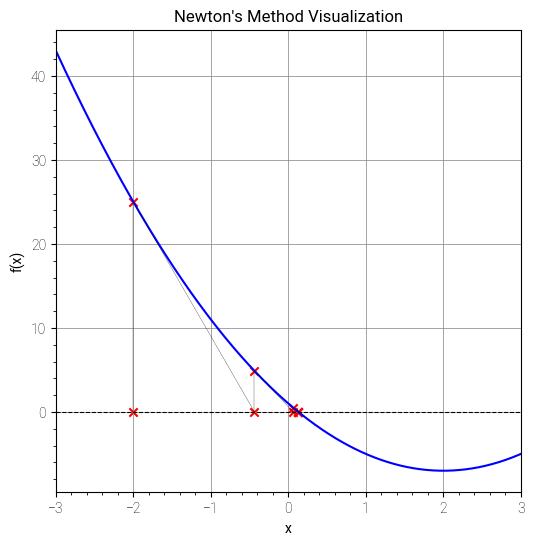

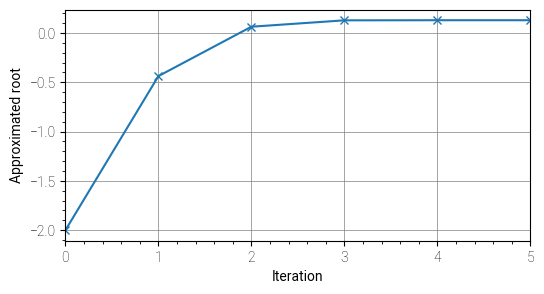

In [9]:

try:
    root, iterations, x_vals = newton_method(f, f_prime, x0=-2.0)
    print(f"求得根的近似值: {root}")
    print(f"迭代次数: {iterations}")

    # 可视化
    visualize_newton(f, x_vals)
    visualize_convergence(x_vals)

except ValueError as e:
    print(e)